In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import sys
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import json
import pickle
from pprint import pprint

from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole

import seaborn as sns
from mpl_toolkits import mplot3d
# import plotly.express as px
sns.set_style("whitegrid")

Traceback (most recent call last):
  File "/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/rdkit/Chem/PandasTools.py", line 130, in <module>
    if 'display.width' in pd.core.config._registered_options:
AttributeError: module 'pandas.core' has no attribute 'config'


In [19]:
df_datasets = pd.read_csv('./datasets.csv')

In [20]:
df_datasets.head()

,SMILES,dataset,len_smiles,sa_score,sc_score,tb_depth,tb_plausibility,tb_price,tb_synthesizability
0,Cc1occc1CN(C)C(=O)c1cc(Br)c[nH]1,moses,32,2.595324,3.386202,3,0.967149,139.0,1
1,CC(OCC(F)(F)F)C(=O)Nc1ccc(Br)cc1O,moses,33,2.748776,2.504700,4,0.955559,17.0,1
2,CC1CCCC(N(C)C(=O)NC(C)C2CCCO2)C1,moses,32,3.622987,3.823689,2,0.976041,71.0,1
3,COCC(=O)Nc1ccc(CCC(=O)N2CCCC2)cc1,moses,33,1.745127,3.117510,2,0.999554,12.0,1
4,O=S(=O)(CCn1nnc2ccccc21)NCc1ccccc1,moses,34,2.065714,2.405881,4,0.882357,5.0,1


In [3]:
def count_plot(df, x1, x2):
    x1_candidate = list(set(df[x1]))
    x2_candidate = list(set(df[x2]))
    data = np.zeros([len(x1_candidate), len(x2_candidate)])
    for i in range(len(x1_candidate)):
        for j in range(len(x2_candidate)):
            data[i][j] = len(df[df[x1] == x1_candidate[i]][df[x2] == x2_candidate[j]])
            
    return pd.DataFrame(data, columns=x2_candidate, index=x1_candidate)
    
def normalize(df, axis=1):
    if -1 in df.columns:
        n_sum = np.array(list(df.sum(axis) - df[-1]))
    else:
        n_sum = np.array(list(df.sum(axis)))

    if axis == 1:
        return df / n_sum.reshape(-1, 1)
    elif axis == 0:
        return df / n_sum.reshape(1, -1)

In [24]:
df_data_count = count_plot(df_datasets, 'dataset', 'tb_depth')
df_data_count = normalize(df, axis=1)

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [25]:
df_data_count

,0,1,2,3,4,5,6,7,8,9,10,11,-1
moses,0.000333,0.208333,0.224333,0.184000,0.106667,0.071000,0.042000,0.029667,0.014000,0.012333,0.005000,0.102333,0.000000
gdb,0.000000,0.000000,0.001667,0.002333,0.006333,0.004000,0.005000,0.006333,0.005000,0.002667,0.001000,0.965667,0.000000
zinc,0.001963,0.130236,0.150524,0.123037,0.076571,0.043194,0.039921,0.021597,0.009162,0.009162,0.005236,0.389398,0.963351
guacamol,0.009333,0.126000,0.130333,0.107000,0.095667,0.067333,0.050667,0.041333,0.026667,0.017667,0.010667,0.317333,0.000000


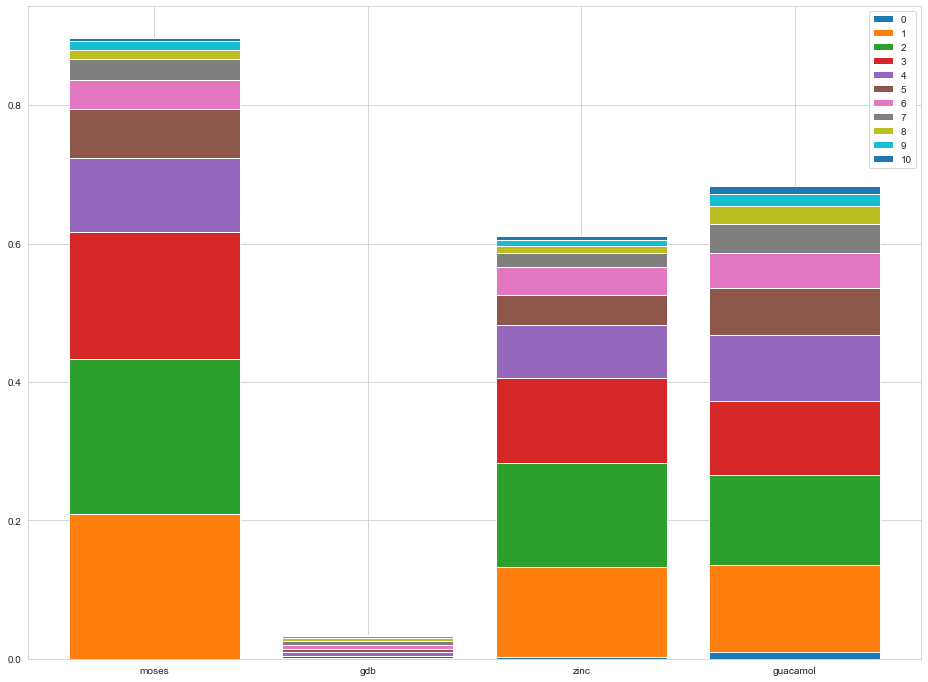

In [26]:
fig = plt.figure(figsize=[16, 12])
plt.bar(list(df_data_count.index), np.array(df_data_count[0]), label='0')
accum = np.array(df_data_count[0])
for i in range(1, len(df_data_count.columns)-2):
    col_name = df_data_count.columns[i]
    plt.bar(list(df_data_count.index), np.array(df_data_count[col_name]), bottom=accum, label=str(col_name))
    accum = accum + np.array(df_data_count[col_name])
    
plt.legend()
plt.show()
fig.savefig('./datasets.png')

In [28]:
df_sheridan = pd.read_csv('./done_sheridan.csv')
df_sheridan

,SMILES,tb_synthesizability,tb_depth,tb_plausibility,tb_price,mean_complexity,sa_score,sc_score,len_smiles
0,CN(C)CCCN1c2ccccc2CCc2ccccc12,1,0,1.000000,7.0,1.938462,1.9331,3.0930,29
1,CC(C)NC[C@@H](O)COc1ccc(CC(=O)N)cc1,1,0,1.000000,24.0,1.650000,2.4358,3.4710,35
2,C[C@@H](CCc1ccccc1)NC[C@@H](O)c1ccc(O)c(c1)C(=O)N,1,0,1.000000,10.0,2.055556,2.8086,3.7772,49
3,Nc1ccc(cc1)S(=O)(=O)Nc1nccs1,1,0,1.000000,1.0,1.432432,2.0317,2.3133,28
4,CCC[C@@H](C)C1(CC=C)C(=O)NC(=S)NC1=O,1,0,1.000000,8.0,2.305556,3.7121,2.5216,36
...,...,...,...,...,...,...,...,...,...
1725,C1[C@@]2(OC[C@]1(C)OC)C=C([C@@H]1CC[C@@]34[C@@...,0,11,0.000000,-1.0,4.944444,6.3422,3.8980,144
1726,c1(c(c(O)ccc1OC)O)C[C@@]1(C=2CCCC(C2CC[C@@H]1C...,0,11,0.000000,-1.0,3.472222,3.9093,4.0573,53
1727,C1CC(C)(C)[C@@H]2CCC([C@@H](\C=C3\C=C4C(=CC3=O...,0,11,0.000000,-1.0,3.704545,4.5864,4.0433,66
1728,CC(C)(C)NC[C@@H](CSc1nc(cs1)c1ccc(C(N)=O)s1)O,1,0,1.000000,84.0,2.574074,3.2400,3.6808,45


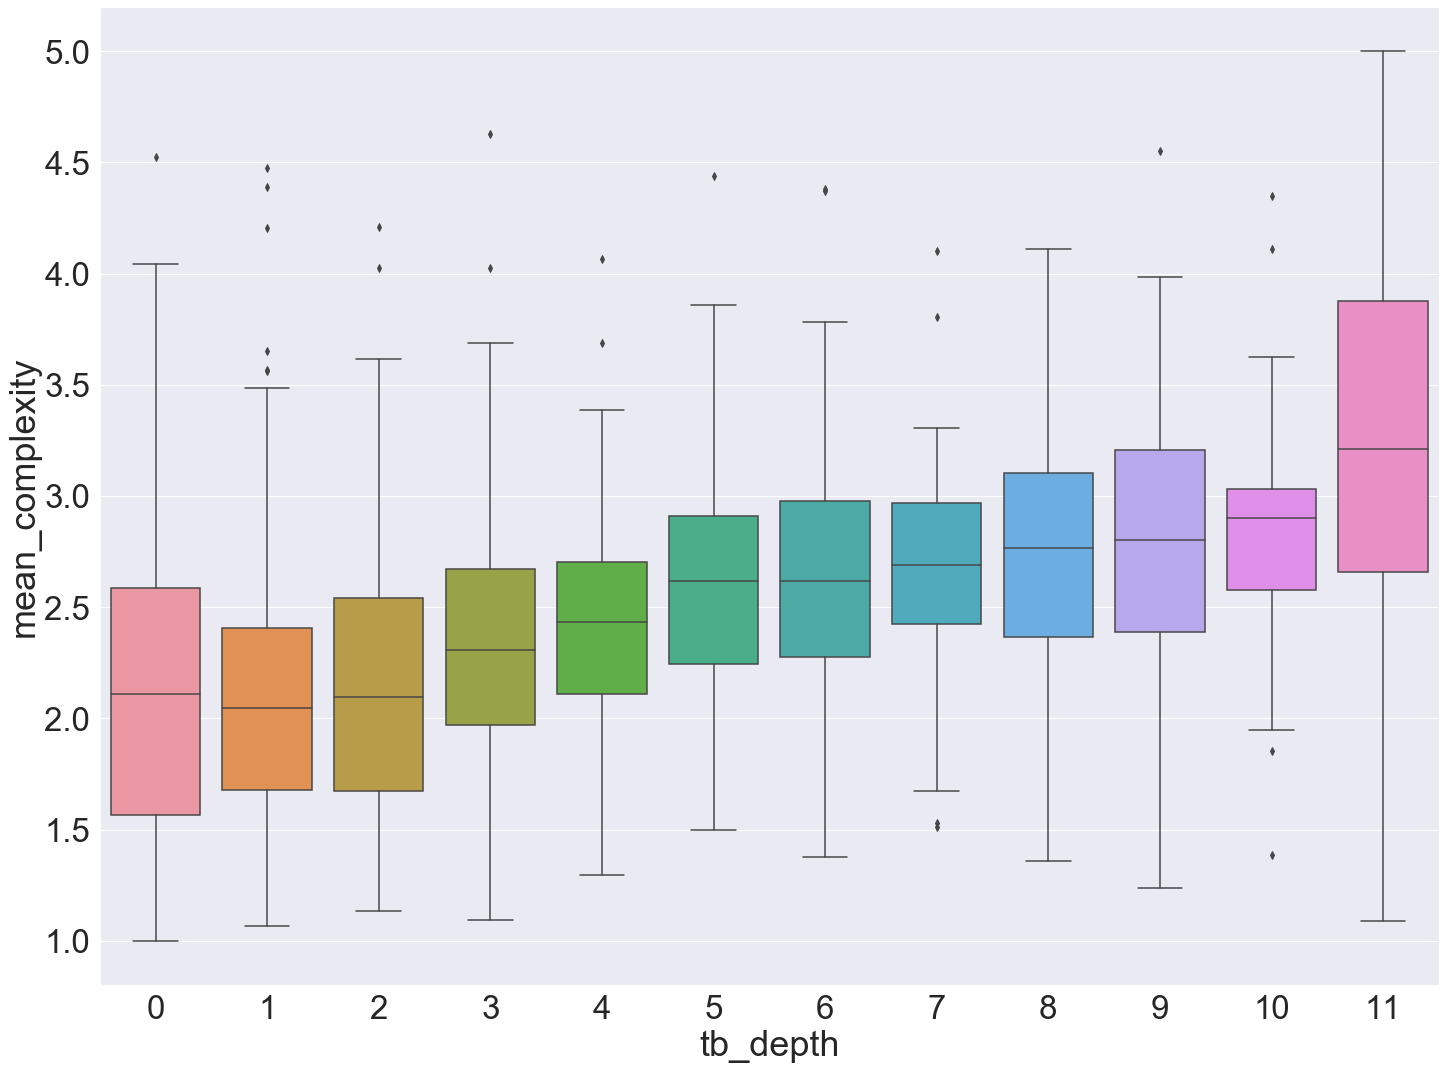

In [177]:
fig = plt.figure(figsize=[24, 18])
sns.set(font_scale=3)
ax = sns.boxplot(x="tb_depth", y="mean_complexity", data=df_sheridan)
# fig.savefig('./sheridan_price_depth.png')

In [45]:
df_datasets

,SMILES,dataset,len_smiles,sa_score,sc_score,tb_depth,tb_plausibility,tb_price,tb_synthesizability
0,Cc1occc1CN(C)C(=O)c1cc(Br)c[nH]1,moses,32,2.595324,3.386202,3,0.967149,139.0,1
1,CC(OCC(F)(F)F)C(=O)Nc1ccc(Br)cc1O,moses,33,2.748776,2.504700,4,0.955559,17.0,1
2,CC1CCCC(N(C)C(=O)NC(C)C2CCCO2)C1,moses,32,3.622987,3.823689,2,0.976041,71.0,1
3,COCC(=O)Nc1ccc(CCC(=O)N2CCCC2)cc1,moses,33,1.745127,3.117510,2,0.999554,12.0,1
4,O=S(=O)(CCn1nnc2ccccc21)NCc1ccccc1,moses,34,2.065714,2.405881,4,0.882357,5.0,1
...,...,...,...,...,...,...,...,...,...
11995,CC1C2CC(=O)C(CC1=O)C1CC(CC21)C#N,gdb,32,NaN,NaN,11,0.000000,-1.0,0
11996,C1CC2C3CC(CN2C1)C1CNC(C3)C=C1,gdb,29,NaN,NaN,11,0.000000,-1.0,0
11997,CCC(CC)(N=C1NC(O)=CC(F)=C1F)C#N,gdb,31,NaN,NaN,11,0.000000,-1.0,0
11998,CC1=C2SC=C1CCCNC1C=C2NC1=O,gdb,26,NaN,NaN,11,0.000000,-1.0,0


In [46]:
df_moses = df_datasets[df_datasets['dataset'] == 'moses']

In [76]:
df_temp = pd.concat([df_datasets[df_datasets['dataset'] == 'moses'], df_datasets[df_datasets['dataset'] == 'guacamol']])

In [77]:
df_temp = pd.concat([df_temp, df_sheridan])

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [78]:
df_temp.reset_index(inplace=True, drop=True)

In [80]:
for i in range(len(df_temp)):
    if df_temp['tb_synthesizability'][i] == -1:
        df_temp['tb_synthesizability'][i] = 0

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [81]:
ps = []
sas = []
i = 0
gap = 0.5
while i < 10:
    sas.append(i)
    temp = df_temp[df_temp['sa_score'] > i][df_temp['sa_score'] <= i+gap]
    if len(temp) == 0:
        p = 0
    else:
        p = temp.tb_synthesizability.sum() / len(temp)
    ps.append(p)
    i += gap

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [82]:
ps

[0,
 0,
 1.0,
 0.9984496124031008,
 0.9326732673267327,
 0.7895699908508692,
 0.6159860990443093,
 0.3383177570093458,
 0.1917808219178082,
 0.15508021390374332,
 0.0273972602739726,
 0.06,
 0.03571428571428571,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 0,
 0]

In [84]:
ps[0] = 1
ps[1] = 1

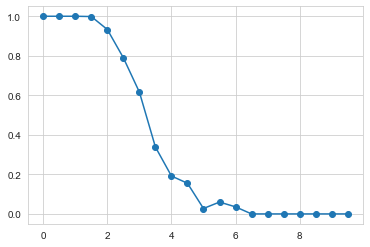

In [85]:
plt.plot(sas, ps, 'o-')
plt.show()

In [89]:
ps = []
sas = []
i = 1
gap = 0.5
while i < 5:
    sas.append(i)
    temp = df_temp[df_temp['sc_score'] > i][df_temp['sc_score'] <= i+gap]
    if len(temp) == 0:
        p = 0
    else:
        p = temp.tb_synthesizability.sum() / len(temp)
    ps.append(p)
    i += gap
    
ps

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[0.8,
 0.9024390243902439,
 0.8436657681940701,
 0.8467507274490785,
 0.80189204229271,
 0.7578332448220924,
 0.6742268041237114,
 0.5483576642335767]

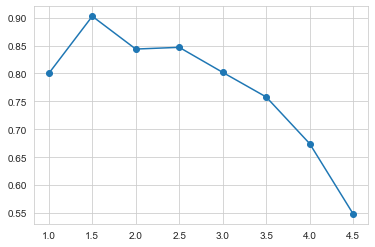

In [90]:
plt.plot(sas, ps, 'o-')
plt.show()

In [91]:
ps = []
sas = []
i = 1
gap = 10
while i < 200:
    sas.append(i)
    temp = df_temp[df_temp['len_smiles'] > i][df_temp['len_smiles'] <= i+gap]
    if len(temp) == 0:
        p = 0
    else:
        p = temp.tb_synthesizability.sum() / len(temp)
    ps.append(p)
    i += gap
    
ps

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[1.0,
 0.8032786885245902,
 0.8615548455804047,
 0.8520392032880177,
 0.7296604740550929,
 0.6237513873473918,
 0.5233812949640287,
 0.4392156862745098,
 0.34951456310679613,
 0.24,
 0.13793103448275862,
 0.13636363636363635,
 0.15384615384615385,
 0.14285714285714285,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

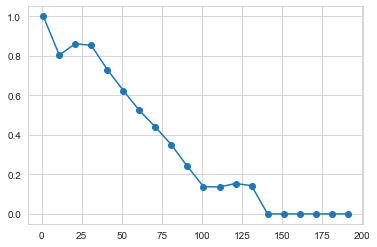

In [92]:
plt.plot(sas, ps, 'o-')
plt.show()

# Distribution Learning

In [83]:
df = pd.read_csv('dl.csv')

In [84]:
df

,SMILES,tb_synthesizability,tb_depth,tb_plausibility,tb_price,len_smiles,dataset,method
0,O=C(CS(=O)(=O)c1cccs1)NC1CCc2ccccc21,1,3,0.966991,8.0,36,moses,aae
1,Nc1c(C(=O)NCC(F)(F)F)nnn1-c1ccc(Cl)cc1,0,11,0.000000,-1.0,38,moses,aae
2,CCS(=O)(=O)N(C)C(C)c1ccccc1OC(F)F,1,3,0.230302,85.0,33,moses,aae
3,COC(=O)C(C)(C)NC(=O)c1sccc1OC,1,2,0.578832,13.0,29,moses,aae
4,COC(=O)c1[nH]c(C)cc1NC(=O)c1cnn(Cc2ccccc2)c1C,1,3,0.152077,78.0,45,moses,aae
...,...,...,...,...,...,...,...,...
1795,Cn1c(=O)[nH]c(=O)c2nnc(S)nc21,0,11,0.000000,-1.0,29,chembl,char_rnn
1796,COc1cc(C=C2Cc3c(O)ccc(O)c3C(=O)C2=O)ccc1O,1,7,0.351264,22.0,41,chembl,char_rnn
1797,COC(=O)c1c(C)[nH]c(C)c1C(=O)COc1cc(C)ccc1C,1,2,0.360997,37.0,42,chembl,char_rnn
1798,CC1(C)CC(=O)C2=C(C1)N(c1ccc(C(=O)O)cc1)C(=O)C2=O,0,11,0.000000,-1.0,48,chembl,char_rnn


In [85]:
df_moses = df[df['dataset'] == 'moses']
df_chembl = df[df['dataset'] == 'chembl']

In [86]:
df_moses

,SMILES,tb_synthesizability,tb_depth,tb_plausibility,tb_price,len_smiles,dataset,method
0,O=C(CS(=O)(=O)c1cccs1)NC1CCc2ccccc21,1,3,0.966991,8.0,36,moses,aae
1,Nc1c(C(=O)NCC(F)(F)F)nnn1-c1ccc(Cl)cc1,0,11,0.000000,-1.0,38,moses,aae
2,CCS(=O)(=O)N(C)C(C)c1ccccc1OC(F)F,1,3,0.230302,85.0,33,moses,aae
3,COC(=O)C(C)(C)NC(=O)c1sccc1OC,1,2,0.578832,13.0,29,moses,aae
4,COC(=O)c1[nH]c(C)cc1NC(=O)c1cnn(Cc2ccccc2)c1C,1,3,0.152077,78.0,45,moses,aae
...,...,...,...,...,...,...,...,...
895,Cn1c(=O)[nH]c(=O)c2cc(-c3noc(-c4cccnc4)n3)cnc21,0,11,0.000000,-1.0,47,moses,char_rnn
896,CSc1ccc(C(=O)N(C)Cc2nccn2C(F)F)cc1,1,5,0.447269,27.0,34,moses,char_rnn
897,Cc1cc(S(=O)(=O)N(C)C)cc(NC(=O)c2cc[nH]n2)c1C,1,4,0.813772,8.0,44,moses,char_rnn
898,CC(=O)NC(C)c1ccc(S(=O)(=O)N(C)C)cc1,1,2,0.245668,82.0,35,moses,char_rnn


In [87]:
df_moses_count = count_plot(df_moses, 'method', 'tb_depth')
df_moses_count = normalize(df_moses_count, axis=1)

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [88]:
df_moses_count

,0,1,2,3,4,5,6,7,8,9,10,11
char_rnn,0.003333,0.230000,0.203333,0.180000,0.113333,0.070000,0.043333,0.023333,0.013333,0.006667,0.006667,0.106667
aae,0.000000,0.223333,0.226667,0.130000,0.083333,0.066667,0.026667,0.016667,0.013333,0.000000,0.003333,0.210000
vae,0.000000,0.236667,0.233333,0.183333,0.110000,0.050000,0.023333,0.013333,0.003333,0.013333,0.003333,0.130000


In [89]:
df_data_count.iloc[0, :]

 0     0.000333
 1     0.208333
 2     0.224333
 3     0.184000
 4     0.106667
 5     0.071000
 6     0.042000
 7     0.029667
 8     0.014000
 9     0.012333
 10    0.005000
 11    0.102333
-1     0.000000
Name: moses, dtype: float64

In [90]:
df_moses_count = pd.concat([df_moses_count, pd.DataFrame({'moses': df_data_count.iloc[0, :]}).T])

In [91]:
df_moses_count = df_moses_count.iloc[:, 1:]

In [92]:
df_moses_count

,0,1,2,3,4,5,6,7,8,9,10,11
char_rnn,0.003333,0.230000,0.203333,0.180000,0.113333,0.070000,0.043333,0.023333,0.013333,0.006667,0.006667,0.106667
aae,0.000000,0.223333,0.226667,0.130000,0.083333,0.066667,0.026667,0.016667,0.013333,0.000000,0.003333,0.210000
vae,0.000000,0.236667,0.233333,0.183333,0.110000,0.050000,0.023333,0.013333,0.003333,0.013333,0.003333,0.130000
moses,0.000333,0.208333,0.224333,0.184000,0.106667,0.071000,0.042000,0.029667,0.014000,0.012333,0.005000,0.102333


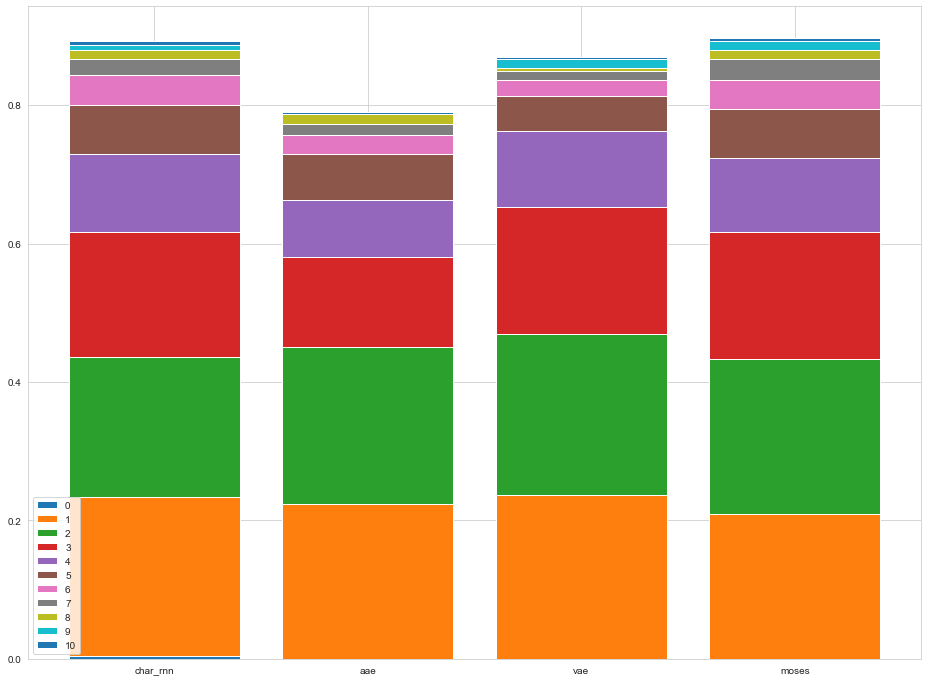

In [93]:
fig = plt.figure(figsize=[16, 12])
plt.bar(list(df_moses_count.index), np.array(df_moses_count[0]), label='0')
accum = np.array(df_moses_count[0])
for i in range(1, len(df_moses_count.columns)-1):
    col_name = df_moses_count.columns[i]
    plt.bar(list(df_moses_count.index), np.array(df_moses_count[col_name]), bottom=accum, label=str(col_name))
    accum = accum + np.array(df_moses_count[col_name])
    
plt.legend()
plt.show()
fig.savefig('./dl_moses.png')

In [94]:
df_chembl_count = count_plot(df_chembl, 'method', 'tb_depth')
df_chembl_count = normalize(df_chembl_count, axis=1)

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


In [95]:
df_chembl_count

,0,1,2,3,4,5,6,7,8,9,10,11
char_rnn,0.006667,0.096667,0.113333,0.100000,0.093333,0.056667,0.053333,0.046667,0.016667,0.013333,0.006667,0.396667
aae,0.003333,0.143333,0.090000,0.106667,0.073333,0.063333,0.070000,0.036667,0.020000,0.016667,0.020000,0.356667
vae,0.003333,0.106667,0.130000,0.083333,0.080000,0.063333,0.056667,0.016667,0.030000,0.026667,0.003333,0.400000


In [96]:
df_chembl_count = pd.concat([df_chembl_count, pd.DataFrame({'chembl': df_data_count.iloc[3, :]}).T])

In [97]:
df_chembl_count = df_chembl_count.iloc[:, 1:]

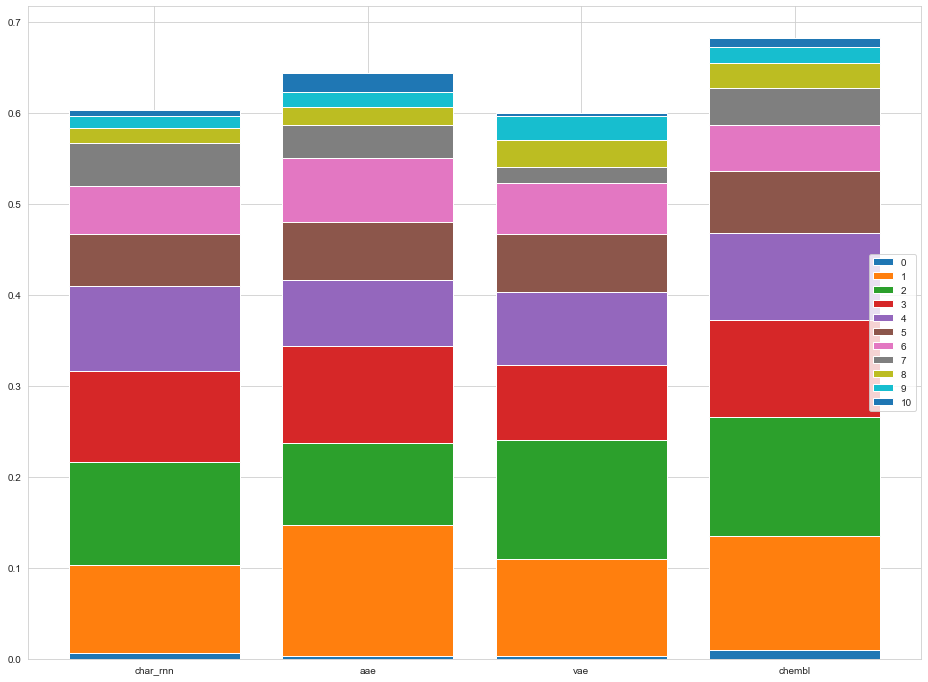

In [98]:
fig = plt.figure(figsize=[16, 12])
plt.bar(list(df_chembl_count.index), np.array(df_chembl_count[0]), label='0')
accum = np.array(df_chembl_count[0])
for i in range(1, len(df_chembl_count.columns)-1):
    col_name = df_chembl_count.columns[i]
    plt.bar(list(df_chembl_count.index), np.array(df_chembl_count[col_name]), bottom=accum, label=str(col_name))
    accum = accum + np.array(df_chembl_count[col_name])
    
plt.legend()
plt.show()
fig.savefig('./dl_chembl.png')

In [99]:
df_chembl_count.index = ['chembl', 'chembl_char_rnn', 'chembl_aae', 'chembl_vae']

In [100]:
df_moses_count.index = ['moses', 'moses_char_rnn', 'moses_aae', 'moses_vae']

In [101]:
df_dl = pd.concat([df_moses_count, df_chembl_count])
df_dl

,0,1,2,3,4,5,6,7,8,9,10,11
moses,0.003333,0.230000,0.203333,0.180000,0.113333,0.070000,0.043333,0.023333,0.013333,0.006667,0.006667,0.106667
moses_char_rnn,0.000000,0.223333,0.226667,0.130000,0.083333,0.066667,0.026667,0.016667,0.013333,0.000000,0.003333,0.210000
moses_aae,0.000000,0.236667,0.233333,0.183333,0.110000,0.050000,0.023333,0.013333,0.003333,0.013333,0.003333,0.130000
moses_vae,0.000333,0.208333,0.224333,0.184000,0.106667,0.071000,0.042000,0.029667,0.014000,0.012333,0.005000,0.102333
chembl,0.006667,0.096667,0.113333,0.100000,0.093333,0.056667,0.053333,0.046667,0.016667,0.013333,0.006667,0.396667
chembl_char_rnn,0.003333,0.143333,0.090000,0.106667,0.073333,0.063333,0.070000,0.036667,0.020000,0.016667,0.020000,0.356667
chembl_aae,0.003333,0.106667,0.130000,0.083333,0.080000,0.063333,0.056667,0.016667,0.030000,0.026667,0.003333,0.400000
chembl_vae,0.009333,0.126000,0.130333,0.107000,0.095667,0.067333,0.050667,0.041333,0.026667,0.017667,0.010667,0.317333


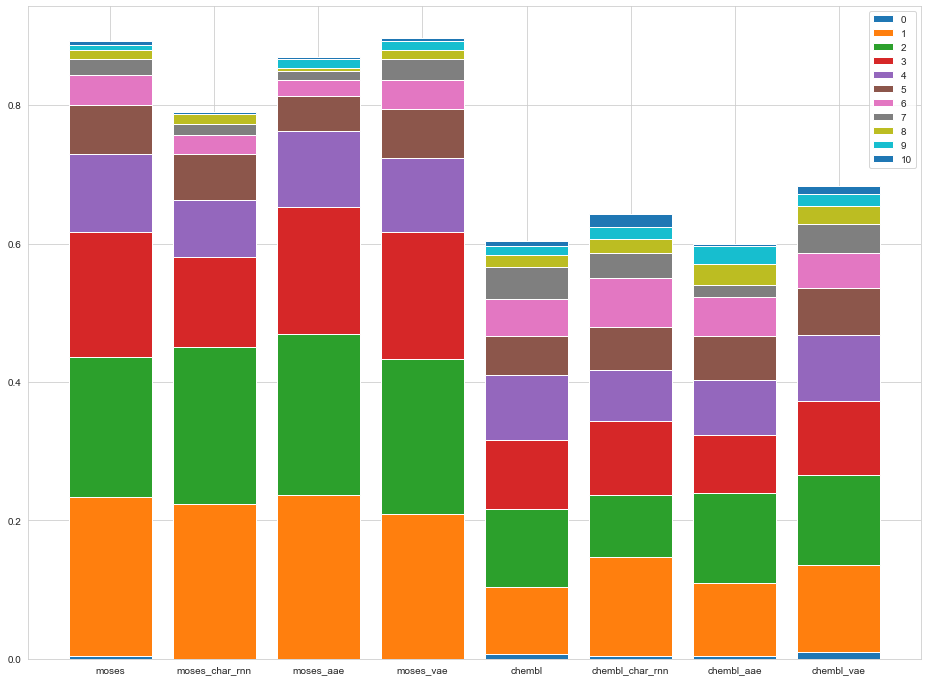

In [102]:
fig = plt.figure(figsize=[16, 12])
plt.bar(list(df_dl.index), np.array(df_dl[0]), label='0')
accum = np.array(df_dl[0])
for i in range(1, len(df_dl.columns)-1):
    col_name = df_dl.columns[i]
    plt.bar(list(df_dl.index), np.array(df_dl[col_name]), bottom=accum, label=str(col_name))
    accum = accum + np.array(df_dl[col_name])
    
plt.legend()
plt.show()
fig.savefig('./dl.png')

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


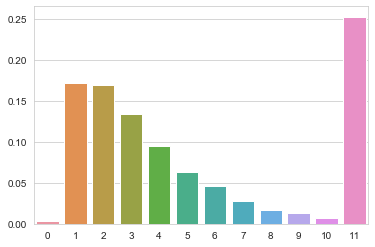

In [110]:
ax = sns.barplot(data=df_dl,ci=0)

# Goal directed generation

In [165]:
df_chembl_wo = pd.read_csv('./chembl_wo.csv')
df_chembl_wa = pd.read_csv('./chembl_wa.csv')
df_chembl_wc = pd.read_csv('./chembl_wc.csv')

df_moses_wo = pd.read_csv('./moses_wo.csv')
df_moses_wa = pd.read_csv('./moses_wa.csv')
df_moses_wc = pd.read_csv('./moses_wc.csv')

In [166]:
df_chembl_wo_count = count_plot(df_chembl_wo[df_chembl_wo['tb_synthesizability'] == 1], 'property', 'method') / 100
df_chembl_wa_count = count_plot(df_chembl_wa[df_chembl_wa['tb_synthesizability'] == 1], 'property', 'method') / 100
df_chembl_wc_count = count_plot(df_chembl_wc[df_chembl_wc['tb_synthesizability'] == 1], 'property', 'method') / 100

df_moses_wo_count = count_plot(df_moses_wo[df_moses_wo['tb_synthesizability'] == 1], 'property', 'method') / 100
df_moses_wa_count = count_plot(df_moses_wa[df_moses_wa['tb_synthesizability'] == 1], 'property', 'method') / 100
df_moses_wc_count = count_plot(df_moses_wc[df_moses_wc['tb_synthesizability'] == 1], 'property', 'method') / 100

In [167]:
df_moses_wo_count, df_moses_wa_count, df_moses_wc_count 

(                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 CNS MPO                  0.60      0.88              0.84       0.86
 QED                      0.86      0.86              0.90       0.89
 Pioglitazone MPO         0.56      0.04              0.64       0.00
 C7H8N2O2                 0.96      0.34              1.00       0.77,
                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 SA_isomer               0.95      1.00              1.00       1.00
 SA_QED                  0.98      0.98              0.98       0.98
 SA_CNS                  0.51      1.00              0.99       1.00
 SA_pioglitazone         0.80      0.94              1.00       0.93,
                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 SC_isomer               0.96      0.82              1.00       0.97
 SC_QED                  0.98      0.98              0.99       0.99
 SC_CNS                  0.59      0.99              0.98       0.97
 SC_pioglitazone         0.

In [168]:
df_chembl_wo_count, df_chembl_wa_count, df_chembl_wc_count 

(                  smiles_lstm  best_from_chembl  graph_ga  smiles_ga
 CNS MPO                  0.54              0.68      0.69       0.71
 QED                      0.94              0.85      0.86       0.79
 Pioglitazone MPO         0.31              0.34      0.00       0.00
 C7H8N2O2                 0.89              0.88      0.77       0.71,
                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 SA_isomer               0.95      0.99              0.99       0.98
 SA_QED                  0.97      1.00              1.00       0.98
 SA_CNS                  0.59      0.96              0.96       0.97
 SA_pioglitazone         0.71      0.92              0.90       0.90,
                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 SC_isomer               0.98      0.87              0.93       0.92
 SC_QED                  0.97      0.93              0.97       0.96
 SC_CNS                  0.60      0.83              0.84       0.85
 SC_pioglitazone         0.

In [172]:
df_chembl_wo_count_10 = count_plot(df_chembl_wo[df_chembl_wo['tb_synthesizability'] == 1][df_chembl_wo['rank'] <= 10], 'property', 'method') / 10
df_chembl_wa_count_10 = count_plot(df_chembl_wa[df_chembl_wa['tb_synthesizability'] == 1][df_chembl_wa['rank'] <= 10], 'property', 'method') / 10
df_chembl_wc_count_10 = count_plot(df_chembl_wc[df_chembl_wc['tb_synthesizability'] == 1][df_chembl_wc['rank'] <= 10], 'property', 'method') / 10

df_moses_wo_count_10 = count_plot(df_moses_wo[df_moses_wo['tb_synthesizability'] == 1][df_moses_wo['rank'] <= 10], 'property', 'method') / 10
df_moses_wa_count_10 = count_plot(df_moses_wa[df_moses_wa['tb_synthesizability'] == 1][df_moses_wa['rank'] <= 10], 'property', 'method') / 10
df_moses_wc_count_10 = count_plot(df_moses_wc[df_moses_wc['tb_synthesizability'] == 1][df_moses_wc['rank'] <= 10], 'property', 'method') / 10

In [173]:
df_moses_wo_count_10, df_moses_wa_count_10, df_moses_wc_count_10

(                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 CNS MPO                   0.5       0.7               0.7        0.8
 QED                       0.8       0.8               0.9        0.9
 Pioglitazone MPO          0.5       0.1               0.9        0.0
 C7H8N2O2                  1.0       0.8               1.0        1.0,
                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 SA_isomer                0.9       1.0               1.0        1.0
 SA_QED                   1.0       1.0               1.0        1.0
 SA_CNS                   0.4       1.0               1.0        1.0
 SA_pioglitazone          0.9       1.0               1.0        0.9,
                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 SC_isomer                1.0       0.9               1.0        1.0
 SC_QED                   1.0       1.0               1.0        1.0
 SC_CNS                   0.5       1.0               1.0        1.0
 SC_pioglitazone          0

In [174]:
df_chembl_wo_count_10, df_chembl_wa_count_10, df_chembl_wc_count_10

(                  smiles_lstm  best_from_chembl  graph_ga  smiles_ga
 CNS MPO                   0.1               0.5       0.5        0.5
 QED                       0.8               0.9       0.9        0.9
 Pioglitazone MPO          0.8               0.6       0.0        0.0
 C7H8N2O2                  0.7               0.8       0.6        0.8,
                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 SA_isomer                1.0       1.0               1.0        1.0
 SA_QED                   1.0       1.0               1.0        1.0
 SA_CNS                   0.3       1.0               1.0        1.0
 SA_pioglitazone          0.7       0.8               0.8        0.8,
                  smiles_lstm  graph_ga  best_from_chembl  smiles_ga
 SC_isomer                1.0       1.0               1.0        1.0
 SC_QED                   1.0       0.9               0.9        0.9
 SC_CNS                   0.3       0.9               0.9        0.9
 SC_pioglitazone          0

# Hard Goals

In [20]:
df_hard_cwa = pd.read_csv('./goal_hard_cwa.csv')

df_hard_cwa_count = \
    count_plot(df_hard_cwa[df_hard_cwa['tb_synthesizability'] == 1], 'property', 'method') \
    / count_plot(df_hard_cwa, 'property', 'method') 

df_hard_cwa_count_10 = \
    count_plot(df_hard_cwa[df_hard_cwa['tb_synthesizability'] == 1][df_hard_cwa['rank'] <= 10], 'property', 'method') \
    / count_plot(df_hard_cwa[df_hard_cwa['rank'] <= 10], 'property', 'method')

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [21]:
df_hard_cwo = pd.read_csv('./goal_hard_cwo.csv')

df_hard_cwo_count = \
    count_plot(df_hard_cwo[df_hard_cwo['tb_synthesizability'] == 1], 'property', 'method') \
    / count_plot(df_hard_cwo, 'property', 'method') 

df_hard_cwo_count_10 = \
    count_plot(df_hard_cwo[df_hard_cwo['tb_synthesizability'] == 1][df_hard_cwo['rank'] <= 10], 'property', 'method') \
    / count_plot(df_hard_cwo[df_hard_cwo['rank'] <= 10], 'property', 'method')

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [22]:
df_hard_mwo = pd.read_csv('./goal_hard_mwo.csv')

df_hard_mwo_count = \
    count_plot(df_hard_mwo[df_hard_mwo['tb_synthesizability'] == 1], 'property', 'method') \
    / count_plot(df_hard_mwo, 'property', 'method') 

df_hard_mwo_count_10 = \
    count_plot(df_hard_mwo[df_hard_mwo['tb_synthesizability'] == 1][df_hard_mwo['rank'] <= 10], 'property', 'method') \
    / count_plot(df_hard_mwo[df_hard_mwo['rank'] <= 10], 'property', 'method')

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [23]:
df_hard_mwa = pd.read_csv('./goal_hard_mwa.csv')

df_hard_mwa_count = \
    count_plot(df_hard_mwa[df_hard_mwa['tb_synthesizability'] == 1], 'property', 'method') \
    / count_plot(df_hard_mwa, 'property', 'method') 

df_hard_mwa_count_10 = \
    count_plot(df_hard_mwa[df_hard_mwa['tb_synthesizability'] == 1][df_hard_mwa['rank'] <= 10], 'property', 'method') \
    / count_plot(df_hard_mwa[df_hard_mwa['rank'] <= 10], 'property', 'method')

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [24]:
df_hard_mwc = pd.read_csv('./goal_hard_mwc.csv')

df_hard_mwc_count = \
    count_plot(df_hard_mwc[df_hard_mwc['tb_synthesizability'] == 1], 'property', 'method') \
    / count_plot(df_hard_mwc, 'property', 'method') 

df_hard_mwc_count_10 = \
    count_plot(df_hard_mwc[df_hard_mwc['tb_synthesizability'] == 1][df_hard_mwc['rank'] <= 10], 'property', 'method') \
    / count_plot(df_hard_mwc[df_hard_mwc['rank'] <= 10], 'property', 'method')

/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/Users/gaowh/anaconda3/envs/rdkit/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [18]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "black"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

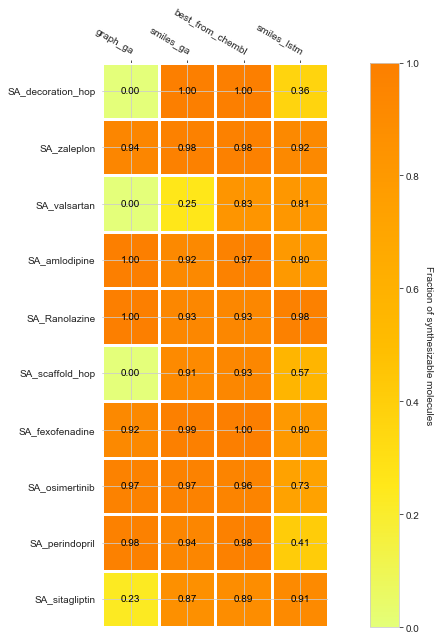

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

im, cbar = heatmap(df_hard_cwa_count.values, df_hard_cwa_count.index, df_hard_cwa_count.columns, ax=ax, cmap="Wistia", 
                   cbarlabel="Fraction of synthesizable molecules", vmin=0, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

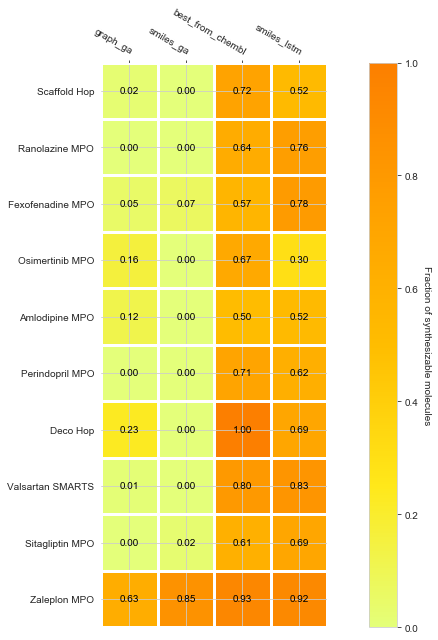

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

im, cbar = heatmap(df_hard_cwo_count.values, df_hard_cwo_count.index, df_hard_cwo_count.columns, ax=ax, cmap="Wistia", 
                   cbarlabel="Fraction of synthesizable molecules", vmin=0, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

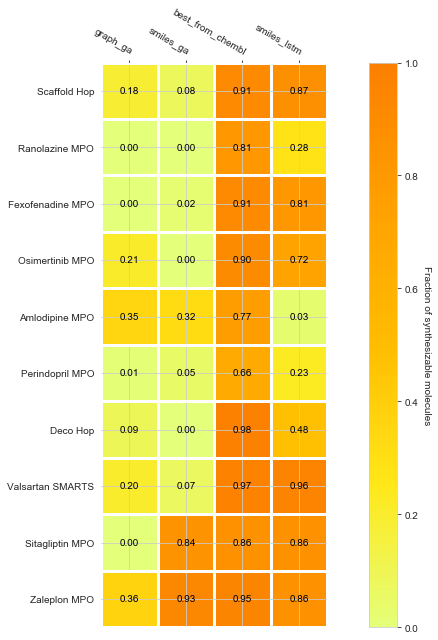

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

im, cbar = heatmap(df_hard_mwo_count.values, df_hard_mwo_count.index, df_hard_mwo_count.columns, ax=ax, cmap="Wistia", 
                   cbarlabel="Fraction of synthesizable molecules", vmin=0, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

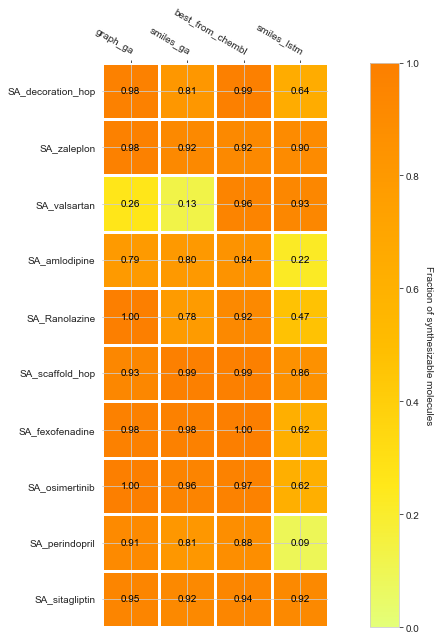

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

im, cbar = heatmap(df_hard_mwa_count.values, df_hard_mwa_count.index, df_hard_mwa_count.columns, ax=ax, cmap="Wistia", 
                   cbarlabel="Fraction of synthesizable molecules", vmin=0, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()

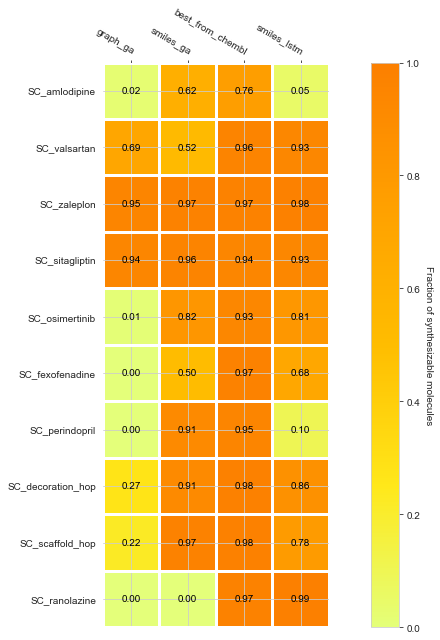

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))

im, cbar = heatmap(df_hard_mwc_count.values, df_hard_mwc_count.index, df_hard_mwc_count.columns, ax=ax, cmap="Wistia", 
                   cbarlabel="Fraction of synthesizable molecules", vmin=0, vmax=1)
texts = annotate_heatmap(im, valfmt="{x:.2f}")

fig.tight_layout()
plt.show()